## 군집 평가 : 실루엣 분석

- clustering은 비지도 학습이기 때문에 target 값이 없음
- target 값이 없기 때문에 분류가 잘 된건지 평가할 지표가 필요함
- 실루엣 계수(silhouette coefficient)를 통한 실루엣 분석 !
    - 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df = pd.DataFrame(data = iris.data, columns=feature_names)

kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter=300, random_state=0)
kmeans.fit(df)

df['cluster'] = kmeans.labels_

In [4]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [6]:
# iris의 모든 개별 데이터 포인트에 대해서 실루엣 계수값을 구함
score_samples = silhouette_samples(iris.data, df['cluster'])
print('silhouette_samples() return 값의 shape: ', score_samples.shape)

silhouette_samples() return 값의 shape:  (150,)


In [8]:
# df에 실루엣 계수 컬럼 추가
df['silhouette_coeff'] = score_samples
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [9]:
# 모든 데이터의 평균 실루엣 계수값을 구함
average_score = silhouette_score(iris.data, df['cluster'])
print('붓꽃 데이터셋 silhouette analysis score : {0:.3f}'.format(average_score))

붓꽃 데이터셋 silhouette analysis score : 0.553


In [10]:
np.mean(df['silhouette_coeff'])

0.5528190123564095

In [11]:
df.groupby(['cluster'])['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

- 1번 군집의 경우 실루엣 계수가 평균적으로 높음
- 1번 군집이 아닌 다른 군집의 경우 실루엣 계수 값이 낮음

<AxesSubplot:>

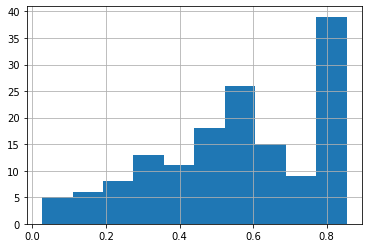

In [12]:
df.silhouette_coeff.hist()

- choose an optimal value for n_clusters with silhouette coefficients